# Drug Label Analysis, OpenFDA

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
import numpy as np

import os
import pprint
import json
import pandas as pd
from pandas.io.json import json_normalize
pprint = pprint.pprint #Set up pretty print

In [2]:
df = pd.read_json('../test_data/drug_labels_all.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134239 entries, 0 to 99999
Columns: 111 entries, abuse to when_using
dtypes: float64(1), int64(2), object(108)
memory usage: 114.7+ MB


In [16]:
for c in df.columns:
    print(c)
#df.columns

abuse
accessories
active_ingredient
adverse_reactions
alarms
animal_pharmacology_and_or_toxicology
ask_doctor
ask_doctor_or_pharmacist
assembly_or_installation_instructions
boxed_warning
calibration_instructions
carcinogenesis_and_mutagenesis_and_impairment_of_fertility
cleaning
clinical_pharmacology
clinical_studies
components
contraindications
controlled_substance
dependence
description
diagram_of_device
disposal_and_waste_handling
do_not_use
dosage_and_administration
dosage_forms_and_strengths
drug_abuse_and_dependence
drug_and_or_laboratory_test_interactions
drug_interactions
effective_time
environmental_warning
food_safety_warning
general_precautions
geriatric_use
guaranteed_analysis_of_feed
health_care_provider_letter
health_claim
how_supplied
id
inactive_ingredient
indications_and_usage
information_for_owners_or_caregivers
information_for_patients
instructions_for_use
intended_use_of_the_device
keep_out_of_reach_of_children
labor_and_delivery
laboratory_tests
mechanism_of_action

In [15]:
df

,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,assembly_or_installation_instructions,boxed_warning,...,teratogenic_effects,troubleshooting,use_in_specific_populations,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,when_using,total_chars
0,None,None,HPUS Active Ingredients Each dose contains equ...,None,None,None,None,None,None,None,...,None,None,None,None,1,None,"Warnings If symptoms persist or worsen, consul...",None,None,2072.0
1,None,None,None,6 ADVERSE REACTIONS Use of levocetirizine dihy...,None,13.2 Animal Toxicology Reproductive Toxicology...,None,None,None,None,...,"Teratogenic Effects: In rats and rabbits, levo...",None,8 USE IN SPECIFIC POPULATIONS 1.Renal Impairme...,None,1,None,None,5 WARNINGS AND PRECAUTIONS 1.Avoid engaging in...,None,64501.0
10,None,None,Active ingredients (in each 30 mL dose cup) Pu...,None,None,None,[Ask a doctor before use if you have liver dis...,None,None,None,...,None,None,None,None,1,None,Warnings Liver warning: This product contains ...,None,When using this product excitability may occur...,3766.0
100,None,None,Active Ingredients Avobenzone 3.0% Homosalate ...,None,None,None,Stop use and ask a doctor if rash occurs,None,None,None,...,None,None,None,None,1,None,For external use only. Do not use on damaged o...,None,When using this product keep out of eyes. Rins...,2982.0
1000,None,None,None,6 ADVERSE REACTIONS Common adverse reactions (...,None,None,None,None,None,WARNING: FETAL TOXICITY When pregnancy is dete...,...,None,None,8 USE IN SPECIFIC POPULATIONS Lactation: Advis...,None,1,None,None,5 WARNINGS AND PRECAUTIONS Angioedema: Discont...,None,65681.0
10000,None,None,ACTIVE INGREDIENT (IN EACH TABLET) Ranitidine ...,None,None,None,Ask a doctor before use if you have frequent c...,None,None,None,...,None,None,None,None,1,None,WARNINGS Allergy alert: Do not use if you are ...,None,None,3839.0
100000,None,None,Active ingredient (in each tablet) Aspirin 81 ...,None,None,None,Ask a doctor before use if •stomach bleeding w...,Ask a doctor or pharmacist before use if you a...,None,None,...,None,None,None,None,2,None,Warnings Reye’s syndrome: Children and teenage...,None,None,4699.0
100001,None,None,None,ADVERSE REACTIONS Central Nervous System – Dro...,None,None,None,None,None,Promethazine HCl Oral Solution should not be u...,...,Teratogenic Effects-Pregnancy Category C Terat...,None,None,None,3,None,WARNINGS Promethazine HCl Oral Solution should...,None,None,38698.0
100002,None,None,"Active ingredient (in each caplet) Ibuprofen, ...",None,None,None,Ask a doctor before use if •stomach bleeding w...,Ask a doctor or pharmacist before use if you a...,None,None,...,None,None,None,None,2,None,Warnings Allergy alert: Ibuprofen may cause a ...,None,When using this product •take with food or mil...,7749.0
100003,None,None,Active ingredient (in each 5 mL = 1 teaspoon) ...,None,None,None,Ask a doctor before use if your child has live...,Ask a doctor or pharmacist before use if your ...,None,None,...,None,None,None,None,5,None,Warnings Liver warning: This product contains ...,None,None,4490.0


In [6]:
len(df.iloc[0]['active_ingredient'])

123

In [3]:
# make a column equal to the total number of characters in strings in each row
df['total_chars'] = 0
# only consider string-like columns
for col in df.select_dtypes(include='object').columns:
    #print(col)
    #print(df[col].str.len())
    df['total_chars'] += np.nan_to_num(df[col].str.len())

In [12]:
df

,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,assembly_or_installation_instructions,boxed_warning,...,teratogenic_effects,troubleshooting,use_in_specific_populations,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,when_using,total_chars
0,None,None,HPUS Active Ingredients Each dose contains equ...,None,None,None,None,None,None,None,...,None,None,None,None,1,None,"Warnings If symptoms persist or worsen, consul...",None,None,2072.0
1,None,None,None,6 ADVERSE REACTIONS Use of levocetirizine dihy...,None,13.2 Animal Toxicology Reproductive Toxicology...,None,None,None,None,...,"Teratogenic Effects: In rats and rabbits, levo...",None,8 USE IN SPECIFIC POPULATIONS 1.Renal Impairme...,None,1,None,None,5 WARNINGS AND PRECAUTIONS 1.Avoid engaging in...,None,64501.0
10,None,None,Active ingredients (in each 30 mL dose cup) Pu...,None,None,None,[Ask a doctor before use if you have liver dis...,None,None,None,...,None,None,None,None,1,None,Warnings Liver warning: This product contains ...,None,When using this product excitability may occur...,3766.0
100,None,None,Active Ingredients Avobenzone 3.0% Homosalate ...,None,None,None,Stop use and ask a doctor if rash occurs,None,None,None,...,None,None,None,None,1,None,For external use only. Do not use on damaged o...,None,When using this product keep out of eyes. Rins...,2982.0
1000,None,None,None,6 ADVERSE REACTIONS Common adverse reactions (...,None,None,None,None,None,WARNING: FETAL TOXICITY When pregnancy is dete...,...,None,None,8 USE IN SPECIFIC POPULATIONS Lactation: Advis...,None,1,None,None,5 WARNINGS AND PRECAUTIONS Angioedema: Discont...,None,65681.0
10000,None,None,ACTIVE INGREDIENT (IN EACH TABLET) Ranitidine ...,None,None,None,Ask a doctor before use if you have frequent c...,None,None,None,...,None,None,None,None,1,None,WARNINGS Allergy alert: Do not use if you are ...,None,None,3839.0
100000,None,None,Active ingredient (in each tablet) Aspirin 81 ...,None,None,None,Ask a doctor before use if •stomach bleeding w...,Ask a doctor or pharmacist before use if you a...,None,None,...,None,None,None,None,2,None,Warnings Reye’s syndrome: Children and teenage...,None,None,4699.0
100001,None,None,None,ADVERSE REACTIONS Central Nervous System – Dro...,None,None,None,None,None,Promethazine HCl Oral Solution should not be u...,...,Teratogenic Effects-Pregnancy Category C Terat...,None,None,None,3,None,WARNINGS Promethazine HCl Oral Solution should...,None,None,38698.0
100002,None,None,"Active ingredient (in each caplet) Ibuprofen, ...",None,None,None,Ask a doctor before use if •stomach bleeding w...,Ask a doctor or pharmacist before use if you a...,None,None,...,None,None,None,None,2,None,Warnings Allergy alert: Ibuprofen may cause a ...,None,When using this product •take with food or mil...,7749.0
100003,None,None,Active ingredient (in each 5 mL = 1 teaspoon) ...,None,None,None,Ask a doctor before use if your child has live...,Ask a doctor or pharmacist before use if your ...,None,None,...,None,None,None,None,5,None,Warnings Liver warning: This product contains ...,None,None,4490.0


In [7]:
df.query('openfda_product_type == "HUMAN OTC DRUG"').total_chars.sum()/100*0.01

18132.061100000003

In [10]:
# estimate amazon pricing
df['total_chars'].sum()/100 * 0.01 #$320,000... that's way too much money.

319012.9817

In [11]:

df.query('total_chars < 50000').total_chars.sum()

974622541.0

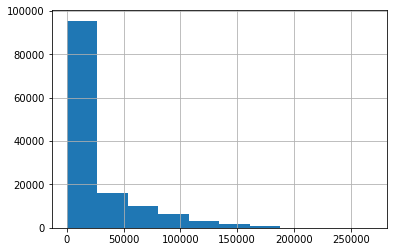

In [12]:
df.total_chars.hist()

In [8]:
df.query('openfda_product_type == "HUMAN PRESCRIPTION DRUG"').total_chars.sum()/100*0.01

195538.23350000003

In [18]:
df[['openfda_brand_name', 'openfda_product_type']]

,openfda_brand_name,openfda_product_type
0,BrightSpark,HUMAN OTC DRUG
1,levocetirizine dihydrochloride,HUMAN PRESCRIPTION DRUG
10,Family Care Cold and Flu Multi Symptom,HUMAN OTC DRUG
100,Aloe Up Pro SPF 30 Sunscreen,HUMAN OTC DRUG
1000,Lisinopril,HUMAN PRESCRIPTION DRUG
10000,Ranitidine,HUMAN OTC DRUG
100000,None,None
100001,PROMETHAZINE HYDROCHLORIDE,HUMAN PRESCRIPTION DRUG
100002,None,None
100003,None,None


In [29]:
with pd.option_context('display.max_rows', 160):
    print(df.loc[99995])

abuse                                                                                                      None
accessories                                                                                                None
active_ingredient                                                           Active Ingredient ETHYL ALCOHOL 65%
adverse_reactions                                                                                          None
alarms                                                                                                     None
animal_pharmacology_and_or_toxicology                                                                      None
ask_doctor                                                                                                 None
ask_doctor_or_pharmacist                                                                                   None
assembly_or_installation_instructions                                                                   

In [3]:
df_rx = df.query('openfda_product_type == "HUMAN PRESCRIPTION DRUG"')

In [4]:
df_rx.to_json('../data/drug_labels_rx_only.json') 

ValueError: 'index=False' is only valid when 'orient' is 'split' or 'table'